In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Nb69W1egOK17AKEXiFHQ6rCSTLcU0k-o8_FP35D40khg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'creditcarddefaulterprediction-donotdelete-pr-xoca7ffsxxfjsg'
object_key = 'Credit Card Defaulter Prediction.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

df_1 = pd.read_excel(body.read())
df_1.tail()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y
29999,30000,50000,M,University,Married,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,Y


In [7]:
# Convert all values in categorical columns to strings
df_1['SEX'] = df_1['SEX'].astype(str)
df_1['EDUCATION'] = df_1['EDUCATION'].astype(str)
df_1['MARRIAGE'] = df_1['MARRIAGE'].astype(str)

# Check and clean column names
df_1.columns = df_1.columns.str.strip().str.lower()
print(df_1.columns)


Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_1['sex'] = le.fit_transform(df_1['sex'])
df_1['education'] = le.fit_transform(df_1['education'])
df_1['marriage'] = le.fit_transform(df_1['marriage'])
df_1['default'] = df_1['default'].apply(lambda x: 1 if x == 'Y' else 0)

# Display the first few rows of the preprocessed data
df_1.head()


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,0,4,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,4,3,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,4,3,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,4,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,4,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


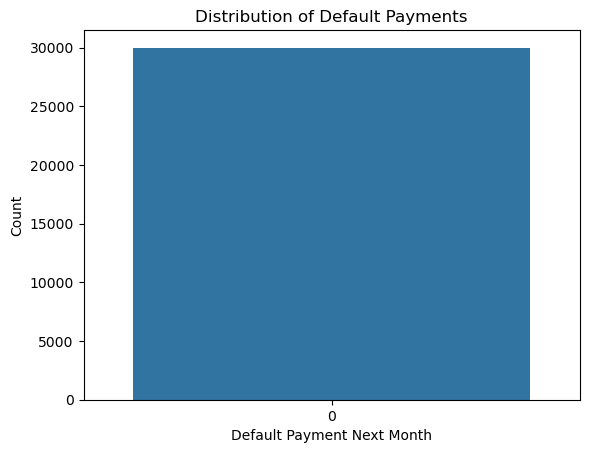

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(df_1['default'])
plt.title('Distribution of Default Payments')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()


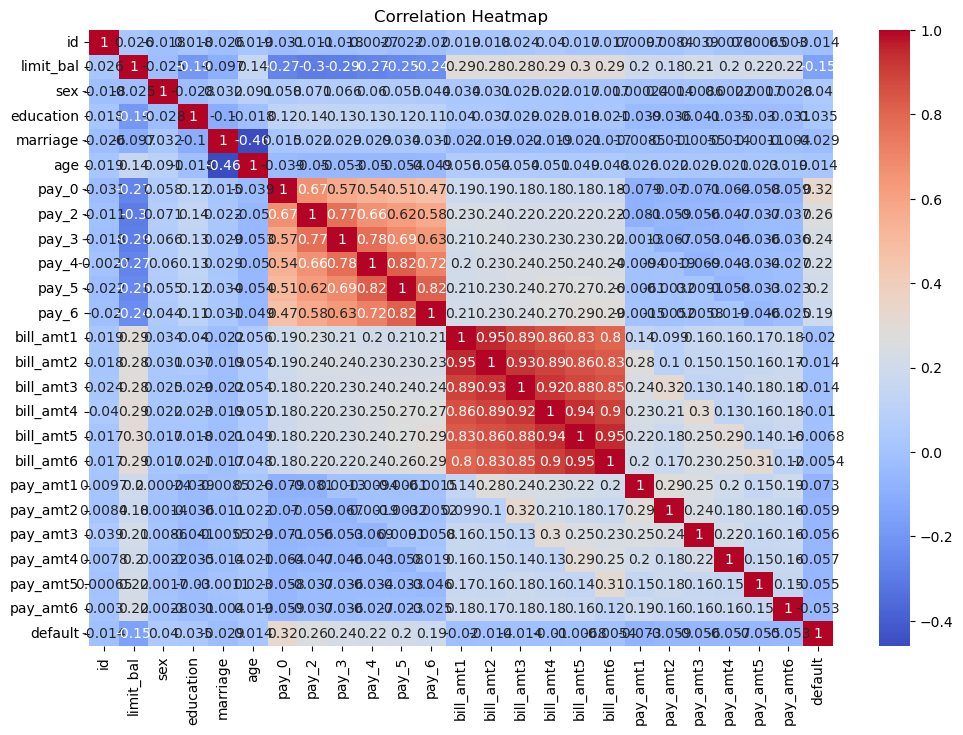

In [10]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_reg))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))
print("Precision:", precision_score(y_test, y_pred_rand_forest))
print("Recall:", recall_score(y_test, y_pred_rand_forest))
print("F1 Score:", f1_score(y_test, y_pred_rand_forest))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rand_forest))


Logistic Regression:
Accuracy: 0.7811666666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5

Random Forest:
Accuracy: 0.8171666666666667
Precision: 0.6483516483516484
Recall: 0.3594821020563595
F1 Score: 0.46251837334639884
ROC-AUC: 0.6524314713396796


/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before resampling: ", y_train.value_counts())
print("After resampling: ", y_resampled.value_counts())


Before resampling:  0    18677
1     5323
Name: default, dtype: int64
After resampling:  0    18677
1    18677
Name: default, dtype: int64


In [16]:
# Logistic Regression with resampled data
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg_resampled = log_reg.predict(X_test)

# Random Forest with resampled data
rand_forest.fit(X_resampled, y_resampled)
y_pred_rand_forest_resampled = rand_forest.predict(X_test)

# Evaluation
print("Logistic Regression with Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_resampled))
print("Precision:", precision_score(y_test, y_pred_log_reg_resampled))
print("Recall:", recall_score(y_test, y_pred_log_reg_resampled))
print("F1 Score:", f1_score(y_test, y_pred_log_reg_resampled))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_reg_resampled))

print("\nRandom Forest with Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest_resampled))
print("Precision:", precision_score(y_test, y_pred_rand_forest_resampled))
print("Recall:", recall_score(y_test, y_pred_rand_forest_resampled))
print("F1 Score:", f1_score(y_test, y_pred_rand_forest_resampled))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rand_forest_resampled))


Logistic Regression with Resampled Data:
Accuracy: 0.5651666666666667
Precision: 0.29813084112149535
Recall: 0.7288651942117289
F1 Score: 0.4231704620826885
ROC-AUC: 0.6240869602379319

Random Forest with Resampled Data:
Accuracy: 0.7911666666666667
Precision: 0.5259515570934256
Recall: 0.4630616907844631
F1 Score: 0.49250708788983394
ROC-AUC: 0.673071276371536


In [17]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg_weighted = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression with Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_weighted))
print("Precision:", precision_score(y_test, y_pred_log_reg_weighted))
print("Recall:", recall_score(y_test, y_pred_log_reg_weighted))
print("F1 Score:", f1_score(y_test, y_pred_log_reg_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_reg_weighted))


Logistic Regression with Class Weights:
Accuracy: 0.6003333333333334
Precision: 0.298551800965466
Recall: 0.6123381568926123
F1 Score: 0.40139790314528206
ROC-AUC: 0.6046542501979597


In [18]:
rand_forest = RandomForestClassifier(class_weight='balanced')
rand_forest.fit(X_train, y_train)
y_pred_rand_forest_weighted = rand_forest.predict(X_test)

# Evaluation
print("Random Forest with Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest_weighted))
print("Precision:", precision_score(y_test, y_pred_rand_forest_weighted))
print("Recall:", recall_score(y_test, y_pred_rand_forest_weighted))
print("F1 Score:", f1_score(y_test, y_pred_rand_forest_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rand_forest_weighted))


Random Forest with Class Weights:
Accuracy: 0.8161666666666667
Precision: 0.65625
Recall: 0.33587204874333587
F1 Score: 0.4443324937027708
ROC-AUC: 0.6432933958246229


In [19]:
import joblib

# Assume Random Forest with Resampled Data performed best
joblib.dump(rand_forest, 'credit_default_model.pkl')


['credit_default_model.pkl']